In [162]:
# import usual suspects

%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp
from datetime import datetime

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [117]:
######################## ######################## ######################## ######################## ########################
######################## ######################## ######################## ######################## ########################
#
# import cleaned weekly ufo data
ufo = pd.read_csv('../Data/Datasets/weeklufo_corona.csv',index_col=0)
# copy into w(orking)ufo df
#wufo = ufo.copy().rename(columns={'rel_val_alltime':'weekly_ufopct'})
# confirm
ufo.tail()

,startdateweek,weekly_ufocount,weekly_ufopct,year,month,weeknum,week_id,date.1,const,corona
date,,,,,,,,,,
2020-08-09,2020-08-09,154,32.765957,2020,8,32,2020-32,2020-08-09,1,True
2020-08-16,2020-08-16,190,40.425532,2020,8,33,2020-33,2020-08-16,1,True
2020-08-23,2020-08-23,147,31.276596,2020,8,34,2020-34,2020-08-23,1,True
2020-08-30,2020-08-30,107,22.765957,2020,8,35,2020-35,2020-08-30,1,True
2020-09-06,2020-09-06,13,2.765957,2020,9,36,2020-36,2020-09-06,1,True


In [118]:
ufoarma = pd.read_csv('../Data/Datasets/nb6_ufoarma.csv')
ufa = ufoarma.copy()

In [119]:
ufa.date = pd.to_datetime(ufa.date)

In [153]:
ufa.index = pd.DatetimeIndex(ufa.date,freq='W')

Timestamp('2020-09-06 00:00:00', freq='W-SUN')

In [167]:
# t(emporary) ufa copy
tufa = ufa.copy().drop(columns={'date'})
tufa = tufa.drop(tufa.index[-1])
tufa

,observed,predicted
date,,
2019-12-08,19.361702,23.708801
2019-12-15,31.276596,22.434861
2019-12-22,34.680851,25.760850
2019-12-29,23.617021,27.863328
2020-01-05,17.659574,25.200226
2020-01-12,25.744681,22.608012
2020-01-19,19.361702,24.216434
2020-01-26,10.000000,22.174320
2020-02-02,14.255319,18.266813


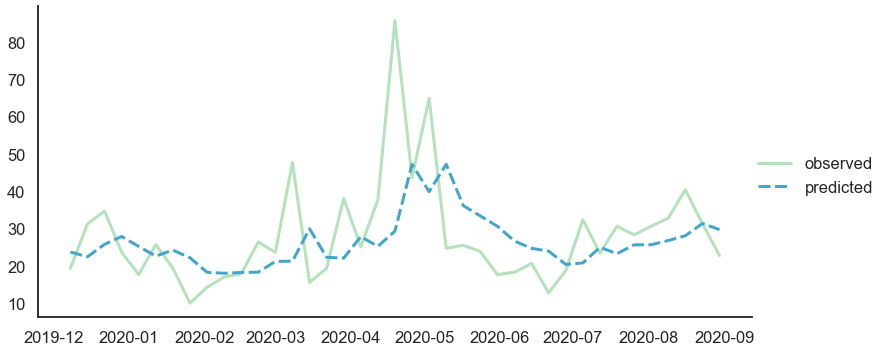

In [163]:
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 3})
  
fig = sns.relplot(data=tufa, aspect=15/7,kind="line",palette='GnBu')
   
sns.despine()


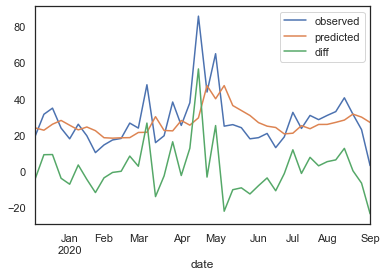

In [103]:
# d(iffence)ufa df
dufa = tufa.copy()

# diff col
dufa['diff'] = tufa.observed-tufa.predicted

# plot
plot10_3 = dufa.plot()

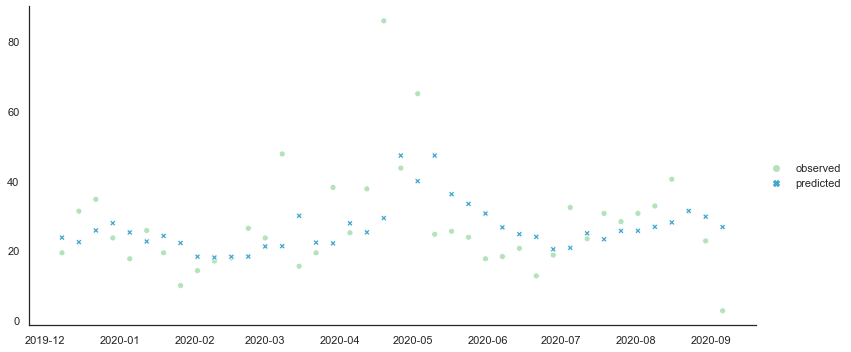

In [104]:
plot10_1 = sns.relplot(data=tufa, aspect=15/7,palette='GnBu');

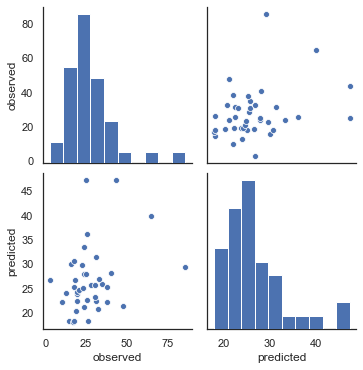

In [105]:
plot10_2 = sns.pairplot(data=tufa)